# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [63]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [64]:
def max_element(arr):
    next_to_zero = np.where(x == 0)[0] + 1
    if len(next_to_zero != 0) and arr[-1]==0:
        next_to_zero = next_to_zero[0:-1]
        return max(arr[next_to_zero])
    elif len(next_to_zero != 0):
        return max(arr[next_to_zero])
    else:
        print('None')

In [65]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(x)

5

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [68]:
def nearest_value(X, v):
    X = np.reshape(X, len(X)*len(X.T))
    min_ind = np.abs(X - v).argmin()
    return X[int(min_ind)]
X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [69]:
def scale(X):
    if np.std(X) == 0:
        print('Division by zero')
    else:
        X = (X - np.mean(X))/np.std(X)
        return X

In [70]:
Y = np.random.randint(100, size=16).reshape((4, 4))
scale(Y)

array([[ 0.18290856, -1.04551439, -1.04551439,  0.58033952],
       [ 1.12229082, -1.04551439,  1.194551  ,  0.32742891],
       [-0.32291265,  1.33907134, -0.82873387,  0.363559  ],
       [ 0.61646961,  1.41133152, -0.97325421, -1.87650639]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [71]:
Y

array([[60, 26, 26, 71],
       [86, 26, 88, 64],
       [46, 92, 32, 65],
       [72, 94, 28,  3]])

In [75]:
def get_stats(X):
    det = np.linalg.det(X)
    trace = np.trace(X)
    max_elem = X.max()
    min_elem = X.min()
    norm = np.linalg.norm(X)
    eig = np.linalg.eig(X)
    inv = np.linalg.inv(X)
    return det, trace, max_elem, min_elem, norm, eig, inv
get_stats(Y)

(22939615.999999996,
 121,
 94,
 3,
 246.06300006299199,
 (array([ 217.38295302 +0.j        ,   25.14142611 +0.j        ,
          -60.76218957+22.47806635j,  -60.76218957-22.47806635j]),
  array([[ 0.39283466+0.j        ,  0.67116994+0.j        ,
           0.37874197+0.07574961j,  0.37874197-0.07574961j],
         [ 0.58089366+0.j        , -0.30621527+0.j        ,
           0.21272909-0.33457402j,  0.21272909+0.33457402j],
         [ 0.54633972+0.j        , -0.67445324+0.j        ,
           0.06568378+0.3101778j ,  0.06568378-0.3101778j ],
         [ 0.45799169+0.j        ,  0.02959654+0.j        ,
          -0.77012885+0.j        , -0.77012885-0.j        ]])),
 array([[ 0.0192209 , -0.00332124, -0.01835096,  0.01356274],
        [-0.00812603, -0.00250588,  0.01122373,  0.00259411],
        [-0.0231404 ,  0.01722993,  0.00862578, -0.00680744],
        [ 0.00929118, -0.00258522,  0.00823902, -0.00991856]]))

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [ ]:
for exp_num in range(100):
    a = np.random.randn(10, 10)
    b = np.random.randn(10, 10)
    print('Максимальный элемент:', np.matmul(a, b).max())


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('2008.csv')

In [2]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.isnull(df).sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

Как мы видим, пропущенные значения есть и немало! Посмотрим, сколько всего пропущенных значений, а также их долю в общей массе данных.

In [4]:
total_nan = pd.isnull(df).sum().sum()
nan_rate = total_nan/(len(df)*len(df.columns))
print(total_nan, nan_rate, sep = '\n')

355215
0.17498275862068965


Как мы видим, как сам объем пропущенных, так и их доля довольно высока

Также мы видим, что, судя по полученным количествам NaN, всего 68589 объектов имеют хотя бы 1 пропуск, а также 15 признаков имеют пропущенные значения.

-----------------------------------------------------

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

В целевой переменной есть 1399 пропущенных значений. Как мы видим почти все объекты в нашем датафрейме имеют пропущенные данные (только около полутора тысяч таковыми не являются). Для анализа авиаперевозок это нормальная ситуация, поскольку очень часто данные по времени прилета/вылета, количества зарегистрированных пассажиров и прочего попросту теряется (в основном, ввиду технических причин). Далее подумаем о признаках, которые могут потенциально быть удалены из анализа ввиду ненадобности. 

In [5]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


 - Это, во-первых, год, месяц, день, день недели: из данных признаков лишь день недели может иметь хоть какое-либо значительное влияние на задержку рейса (в выходные, к примеру, большая нагруженность, что влечет задержки).
 - Номер самолета вовсе не имеет смысла как признак, поскольку никак не влияет ни на что (насколько я могу понимать)

Посмотрим позже, релевантно ли удаление иных признаков.

Для начала удалим все объекты со значениями целевой переменной 0 и NaN

In [6]:
df_ = df[df.DepDelay != 0]
df__ = df_[np.isfinite(df_.DepDelay)]

Теперь избавимся от признаков, признанных выше лишними.

In [7]:
df_pure = df__.drop(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'TailNum'], axis = 1)
df_pure.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2111.0,2055,2308.0,2300,WN,242,57.0,65.0,46.0,8.0,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1426.0,1410,1730.0,1728,XE,2380,124.0,138.0,108.0,2.0,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1143.0,1145,1501.0,1520,WN,1769,138.0,155.0,125.0,-19.0,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1141.0,1144,1323.0,1335,OO,3802,102.0,111.0,79.0,-12.0,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,815.0,820,1243.0,1300,WN,399,148.0,160.0,136.0,-17.0,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [8]:
delay = np.array(df_pure.DepDelay)
df_new = df_pure.drop('DepDelay', axis = 1)

In [9]:
df_new = df_new.reset_index()

In [10]:
df_new = df_new.drop(['index'], axis = 1)

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

Создадим для каждого нового признака списки

In [11]:
DepTime_Hour = []
DepTime_Minute = []
CRSDepTime_Hour = []
CRSDepTime_Minute = []
ArrTime_Hour = []
ArrTime_Minute = []
CRSArrTime_Hour = []
CRSArrTime_Minute = []

Теперь разделим на часы и минуты каждый из рассматриваемых признаков

In [12]:
for i in df_new.DepTime:
    if  i == i:
        DepTime_Hour.append(int(i//100))
        DepTime_Minute.append(int(i - (i//100)*100))
    else:
        DepTime_Hour.append('NaN')
        DepTime_Minute.append('NaN')

In [13]:
for i in df_new.CRSDepTime:
    if  i == i:
        CRSDepTime_Hour.append(int(i//100))
        CRSDepTime_Minute.append(int(i - (i//100)*100))
    else:
        CRSDepTime_Hour.append('NaN')
        CRSDepTime_Minute.append('NaN')

In [14]:
for i in df_new.ArrTime:
    if  i == i:
        ArrTime_Hour.append(int(i//100))
        ArrTime_Minute.append(int(i - (i//100)*100))
    else:
        ArrTime_Hour.append('NaN')
        ArrTime_Minute.append('NaN')

In [15]:
for i in df_new.CRSArrTime:
    if  i == i:
        CRSArrTime_Hour.append(int(i//100))
        CRSArrTime_Minute.append(int(i - (i//100)*100))
    else:
        CRSArrTime_Hour.append('NaN')
        CRSArrTime_Minute.append('NaN')

Удалим изначальные признаки и добавим в датафрейм полученные hh и mm

In [16]:
df_new = df_new.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis = 1)

In [17]:
df_new['DepTime_Hour'] = DepTime_Hour
df_new['DepTime_Minute'] = DepTime_Minute
df_new['CRSDepTime_Hour'] = CRSDepTime_Hour
df_new['CRSDepTime_Minute'] = CRSDepTime_Minute
df_new['ArrTime_Hour'] = ArrTime_Hour
df_new['ArrTime_Minute'] = ArrTime_Minute
df_new['CRSArrTime_Hour'] = CRSArrTime_Hour
df_new['CRSArrTime_Minute'] = CRSArrTime_Minute

In [18]:
df_new.head()

,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,WN,242,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,...,NaN,NaN,21,11,20,55,23,8,23,0
1,XE,2380,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,...,NaN,NaN,14,26,14,10,17,30,17,28
2,WN,1769,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,...,NaN,NaN,11,43,11,45,15,1,15,20
3,OO,3802,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,...,NaN,NaN,11,41,11,44,13,23,13,35
4,WN,399,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,...,NaN,NaN,8,15,8,20,12,43,13,0


----------------

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Для начала вернем в датафрейм столбец ответов (это необходимо для наглядного представления корреляции)

In [19]:
from matplotlib import pyplot as plt
% matplotlib inline

In [20]:
df_new['DepDelay'] = delay

In [21]:
df_corr = df_new.corr()
df_corr.DepDelay

FlightNum            0.021166
ActualElapsedTime    0.041946
CRSElapsedTime       0.034302
AirTime              0.025237
ArrDelay             0.933526
Distance             0.024252
TaxiIn               0.020640
TaxiOut              0.101294
Cancelled           -0.001123
Diverted             0.027166
CarrierDelay         0.532696
WeatherDelay         0.238872
NASDelay             0.171591
SecurityDelay        0.010668
LateAircraftDelay    0.553806
DepTime_Hour         0.203125
DepTime_Minute      -0.017055
CRSDepTime_Hour      0.140084
CRSDepTime_Minute    0.022437
CRSArrTime_Hour      0.135561
CRSArrTime_Minute    0.008609
DepDelay             1.000000
Name: DepDelay, dtype: float64

Итак, избавимся от следующих признаков:
 - ArrDelay. Здесь все очевидно: если есть задержка вылета, то, соответственно, высока вероятность задержки прилета и наоборот
 - CarrierDelay. Задержка по усмотрению компании зачастую в действительности "приводится в действие", что приводит к задержке вылета
 - LateAircraftDelay. Наконец, тут следующая логика (насколько я могу понимать): в большинстве случаев поздняя подача воздушного судна с большой долей вероятности влечет за собой будущую задержку рейса

In [22]:
df_new = df_new.drop(['DepDelay', 'ArrDelay', 'CarrierDelay', 'LateAircraftDelay'], axis = 1)

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

Насколько я могу понимать, то же самое делается дальше, поэтому пропустим этот шаг на данном этапе.


-----------------------

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

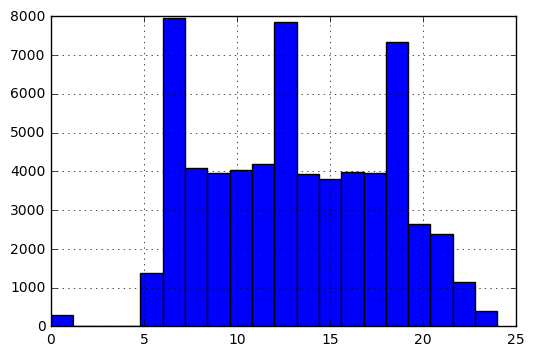

In [23]:
df_new['DepTime_Hour'].hist(bins=20)

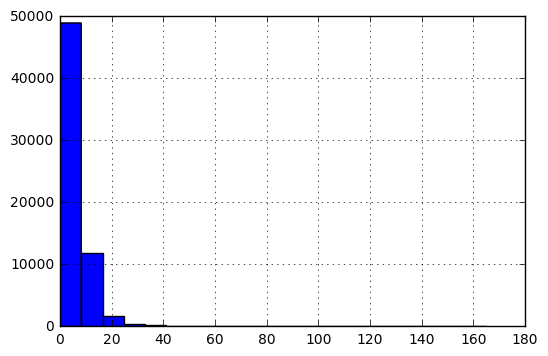

In [24]:
df_new['TaxiIn'].hist(bins=20)

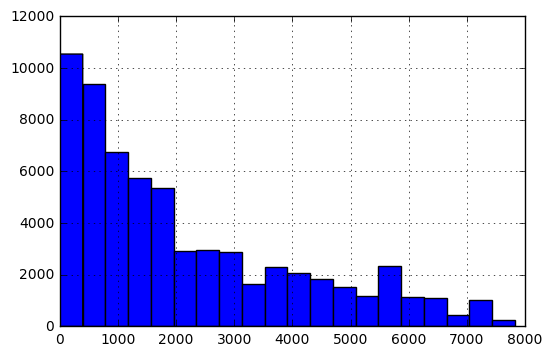

In [25]:
df_new['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Как мы видим, значение объектов в соответствующих признаках сильно отличаются по масштабности значений: от десятков до тысяч. Таким образом, в дальнейшем модель даст не совсем корректные веса для признаков, тем самым ухудшая качество предсказания. Масштабирование призвано избавить от данной проблемы, поскольку приводит значения объектов-признаков к стандартизированному виду, где значения варьируются не сильно.

---------------

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [26]:
def transform_data(data):
    # замена пропущенных значений: для категориальных 
    num_cols = data._get_numeric_data().columns
    cat_cols = data.columns.difference(num_cols)
    data[cat_cols] = data[cat_cols].fillna('nan')
    data[num_cols] = data[num_cols].fillna(0)
    # шкалирование
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(data[num_cols])
    data[num_cols] = scaler.transform(data[num_cols])
    # кодирование категориальных признаков
    return pd.get_dummies(data, columns = cat_cols)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [27]:
prep_df = transform_data(df_new)
prep_df.head()

,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,WeatherDelay,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,-0.013759,-0.049021,-0.077726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,-0.013759,-0.049021,-0.077726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,-0.013759,-0.049021,-0.077726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,-0.013759,-0.049021,-0.077726,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,-0.013759,-0.049021,-0.077726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
print('Теперь после обработки датафрейма в нем', len(prep_df.columns), 'признака')

Теперь после обработки датафрейма в нем 722 признака


**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [29]:
from sklearn.cross_validation import train_test_split

C:\Users\Vlad\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(prep_df, delay, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [38]:
X_train1000 = X_train.iloc[:1000]
y_train1000 = y_train[:1000]

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
lr = LinearRegression()
lr.fit(X_train1000, y_train1000)
y1000_pred_train = lr.predict(X_train1000)

In [58]:
mse1 = mse(y_train1000, y1000_pred_train)
r2_1 = r2(y_train1000, y1000_pred_train)
print('MSE для обучающей выборки = ', mse1)
print('R_2 для обучающей выборки = ', r2_1)

MSE для обучающей выборки =  323.10794747
R_2 для обучающей выборки =  0.695128453522


In [55]:
lr.fit(X_train1000, y_train1000)
y1000_pred_test = lr.predict(X_test)

In [61]:
mse2 = mse(y_test, y1000_pred_test)
r2_2 = r2(y_test, y1000_pred_test)
print('MSE для контрольной выборки = ', mse2)
print('R_2 для контрольной выборки = ', r2_2)

MSE для контрольной выборки =  1.26929337433e+30
R_2 для контрольной выборки =  -9.48884521512e+26


$MSE$ для первой модели очень высок, что говорит о плохом качестве модели и неверном подборе коэффициентов (хотя и $R^2$ довольно высок, что говорит неплохой объяснительной способности модели)
Во второй же модели все наоборот: $MSE$ очень мал, но при этом $R^2$ ведет себя очень бурно, что сложно интерпретировать

--------------------

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [76]:
from sklearn.model_selection import KFold
kf = KFold(4, n_folds=2)

TypeError: __init__() got an unexpected keyword argument 'n_folds'

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [ ]:
# Your code here

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [ ]:
# Your code here